# 1.IMPORT LIBRARIES

In [88]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller

# 2. READING AND PROCESSING DATA

In [89]:
# Read data from the CSV file
file_path = '/content/BTC-USD.csv'  # Change to the actual path of your CSV file
df = pd.read_csv(file_path)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Display the first few rows of the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-11,14968.200195,15018.799805,13105.900391,13405.799805,13405.799805,16534099968
1,2018-01-12,13453.900391,14229.900391,13158.099609,13980.599609,13980.599609,12065699840
2,2018-01-13,13952.400391,14659.500000,13952.400391,14360.200195,14360.200195,12763599872
3,2018-01-14,14370.799805,14511.799805,13268.000000,13772.000000,13772.000000,11084099584
4,2018-01-15,13767.299805,14445.500000,13641.700195,13819.799805,13819.799805,12750799872
...,...,...,...,...,...,...,...
1822,2023-01-07,16952.117188,16975.017578,16914.191406,16955.078125,16955.078125,7714767174
1823,2023-01-08,16954.146484,17091.144531,16924.050781,17091.144531,17091.144531,9768827914
1824,2023-01-09,17093.992188,17389.957031,17093.992188,17196.554688,17196.554688,18624736866
1825,2023-01-10,17192.949219,17484.720703,17162.990234,17446.292969,17446.292969,15808338949


# 3. CHART SHOW


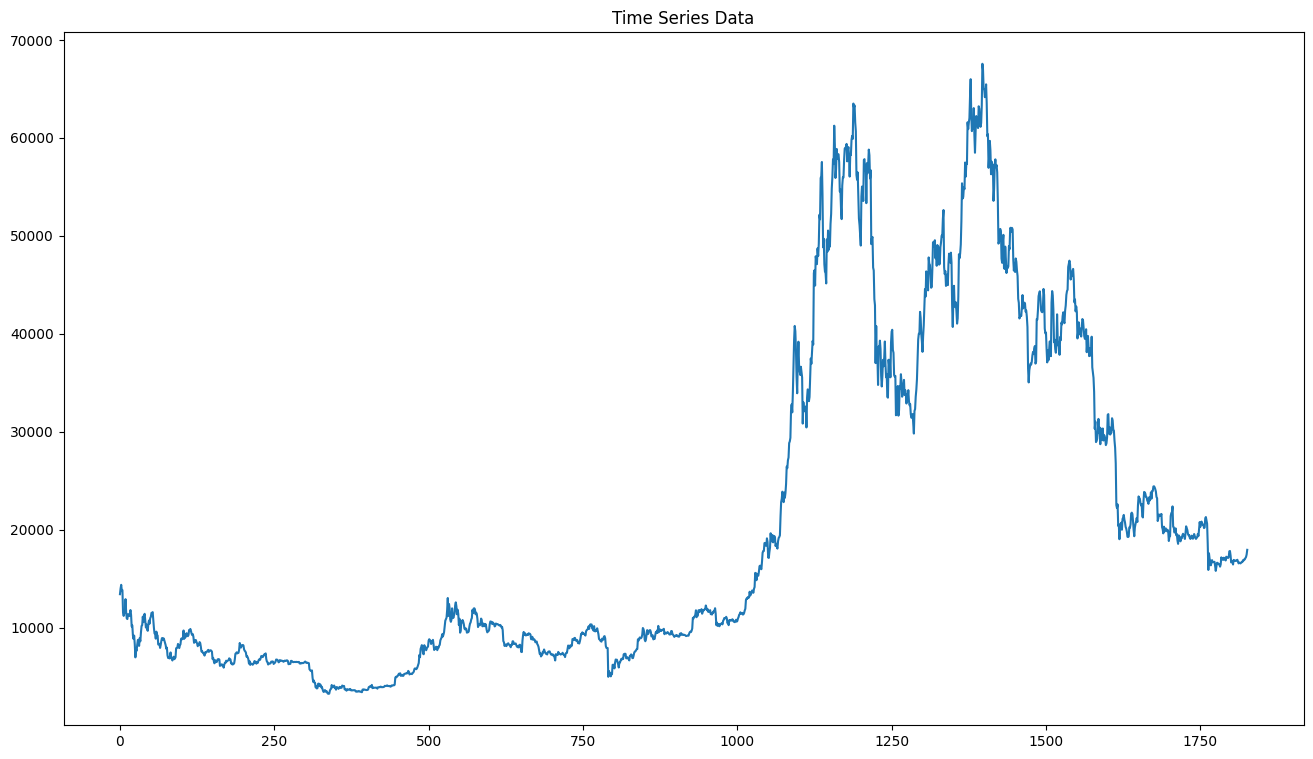

In [90]:
plt.figure(figsize=(16,9))
plt.title('Time Series Data')
plt.plot(df['Close'])
plt.show()

# 4. CHECK ADF TEST TO SEE IF THE DATA IS STATIONARY

In [91]:
# Function to test stationarity using ADF test
def adf_test(timeseries):
    timeseries.replace([np.inf, -np.inf], np.nan, inplace=True)
    timeseries.dropna(inplace=True)
    result = adfuller(timeseries, autolag='AIC')

    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    # Check the p-value
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary.")
    else:
        print("Fail to reject the null hypothesis. Data is non-stationary.")

# Test the stationarity of the data
adf_test(df['Close'])

ADF Statistic: -1.408144772477291
p-value: 0.5783652433874639
Critical Values: {'1%': -3.4339840952648695, '5%': -2.8631452508003057, '10%': -2.567624583142913}
Fail to reject the null hypothesis. Data is non-stationary.


# 5. THE RESULT SHOW THAT THE DATA IS NON-STATIONARY
 SO WE NEED TO USE METHOD TO MAKE IT STATIONARY - IN HERE IS DIFF METHOD

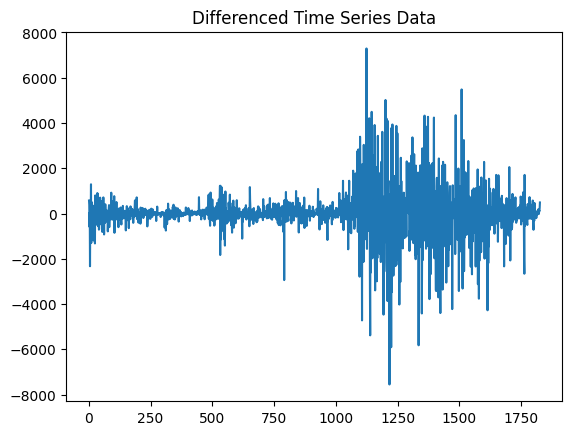

ADF Statistic: -8.440428636126306
p-value: 1.769311166162804e-13
Critical Values: {'1%': -3.4339840952648695, '5%': -2.8631452508003057, '10%': -2.567624583142913}
Reject the null hypothesis. Data is stationary.


In [92]:
# Take the first difference to make the data stationary
df['Close_diff'] = df['Close'].diff().dropna()

# Visualize the differenced data (if needed)
plt.plot(df['Close_diff'])
plt.title('Differenced Time Series Data')
plt.show()

# Test the stationarity of the differenced data
adf_test(df['Close_diff'])

# 6. NOW THE P-VALUE IS < 0.05 SO THE DATA IS STATIONARY
Next we will import auto_arima to find the best model


In [93]:
!pip install pmdarima


In [94]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [95]:
# Split the data into training, testing, and validation sets 6:2:2
train_size = int(0.6 * len(df))
test_size = int(0.2* len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]


x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [96]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=16209.474, Time=1.77 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=16851.471, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=16575.465, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=16205.908, Time=0.39 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=16205.624, Time=1.37 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=16207.527, Time=1.27 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=16207.535, Time=3.44 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=16205.585, Time=0.99 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=16207.533, Time=1.32 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=16209.494, Time=1.21 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=16206.017, Time=2.37 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 14.350 seconds


ARIMA(order=(0, 2, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

# 7. THE BEST ARIMA MODEL IS (1,1,1)


In [97]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [98]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


# Create an array of 100 consecutive integers starting from last_index
x_next_100_days = np.array(range(last_index+1, last_index+101)).reshape(-1, 1)

# Predict the closing prices for the next 100 days
y_next_100_days = model.predict(n_periods=len(x_next_100_days))

# Print the predicted closing prices for the next 100 days
print('Predicted closing prices for the next 100 days:')
print(y_next_100_days)

Predicted closing prices for the next 30 days:
[38676.76901729 39108.74439604 39540.71977479 39972.69515354
 40404.6705323  40836.64591105 41268.6212898  41700.59666855
 42132.57204731 42564.54742606 42996.52280481 43428.49818356
 43860.47356231 44292.44894107 44724.42431982 45156.39969857
 45588.37507732 46020.35045607 46452.32583483 46884.30121358
 47316.27659233 47748.25197108 48180.22734984 48612.20272859
 49044.17810734 49476.15348609 49908.12886484 50340.1042436
 50772.07962235 51204.0550011 ]
Predicted closing prices for the next 100 days:
[38676.76901729 39108.74439604 39540.71977479 39972.69515354
 40404.6705323  40836.64591105 41268.6212898  41700.59666855
 42132.57204731 42564.54742606 42996.52280481 43428.49818356
 43860.47356231 44292.44894107 44724.42431982 45156.39969857
 45588.37507732 46020.35045607 46452.32583483 46884.30121358
 47316.27659233 47748.25197108 48180.22734984 48612.20272859
 49044.17810734 49476.15348609 49908.12886484 50340.1042436
 50772.07962235 51204

# 8. ACCURACY ASSESSMENT

In [99]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
valid_mae = np.mean(np.abs(y_pred_val - y_val))
valid_mape = np.mean(np.abs((y_pred_val - y_val) / y_val)) * 100

test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mae = np.mean(np.abs(y_pred - y_test))
test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

print('Validation RMSE:', valid_rmse)
print('Validation MAE:', valid_mae)
print('Validation MAPE:', valid_mape)

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Validation RMSE: 105471.33268737068
Validation MAE: 90204.24626338558
Validation MAPE: 441.97174025904127
Testing RMSE: 82505.20910728943
Testing MAE: 69634.78036253632
Testing MAPE: 151.48203566944966


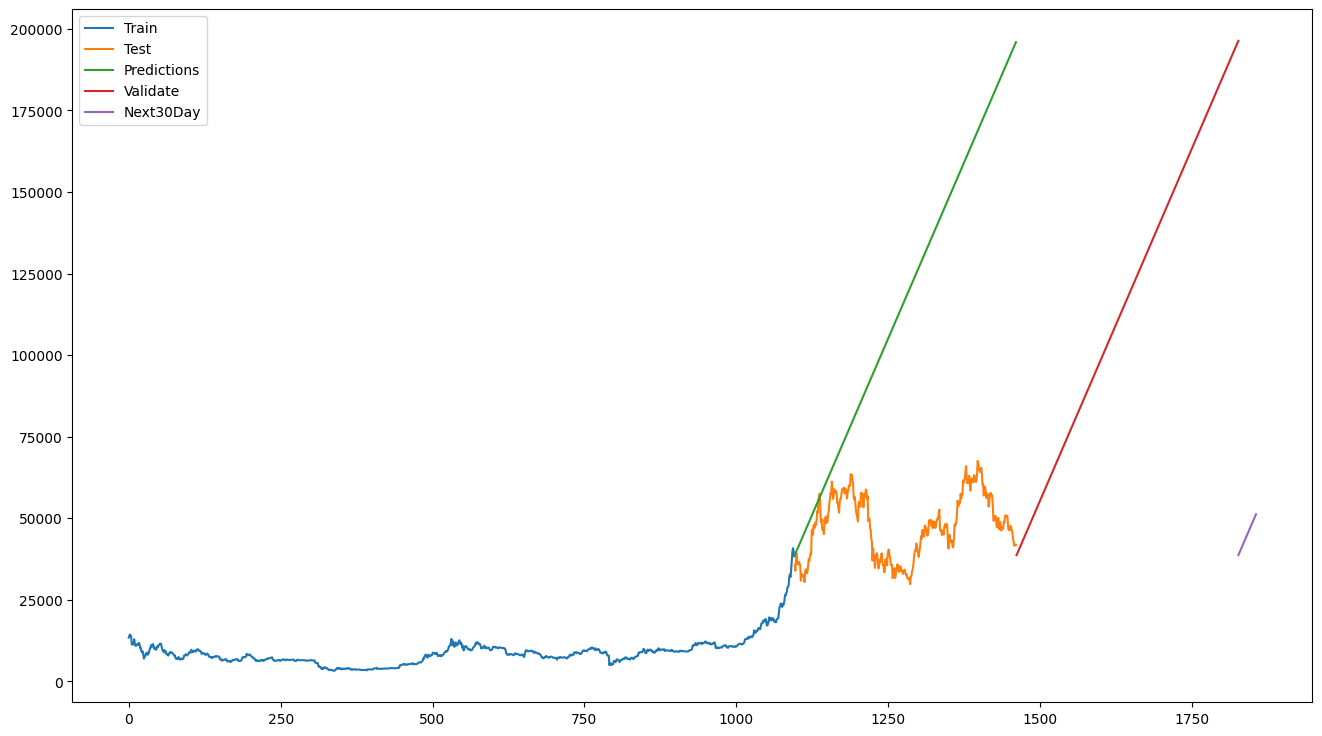

In [100]:

# 9.Vẽ hình
plt.figure(figsize=(16,9))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()